# Skript: Datenvisualisierung Python

### Scatterplot, Barplot, Lineplot

---


In [ ]:
import seaborn as sns

In [ ]:
# Heutige Datensätze:
taxis = sns.load_dataset('taxis')
flights = sns.load_dataset('flights')

In [ ]:
# Anschauen:
taxis.head()

In [ ]:
# Anschauen:
flights.head()

# 0. Plot-Stil

---

Mit `sns.set_style()` können wir einen generellen Plot-Stil für alle Plots des Notebooks einstellen.

Verfügbare Styles: `white`, `whitegrid`, `dark`, `darkgrid` und `ticks`

[Übersicht](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/src/notebooks/104-seaborn-themes.ipynb)

Es können auch eigene Styles definiert werden, sowie ein 'Kontext' und eine Standard-Farbpalette festgelegt werden. Dazu später mehr.

In [ ]:
# Für den Rest des Notebooks festlegen:
sns.set_style('whitegrid')

In [ ]:
# Beispielplot:
sns.barplot(
    taxis,
    x='payment',
    y='total',
    #    errorbar=None,
);
# Quizfrage: Was bedeuten eigentlich die Balkenhöhe/ was zeigen sie an?
# Und wofür stehen die schwarzen Striche?
# ...

In [ ]:
# Anzahl Spalten:
taxis.shape[0]

In [ ]:
# Anzahl Bezahlarten:
taxis['payment'].value_counts()

In [ ]:
# Standardplot hat mean als Schätzer (estimator):
sns.barplot(
    taxis,
    x='payment',
    y='total',
    estimator='mean',
);
# Es gibt andere Schätzer wie median, std, sum

In [ ]:
# Mit Kontext-Manager Stil nur für einen Plot festlegen:
with sns.axes_style('white'):
    sns.barplot(taxis, x='payment', y='total')

# 1. Balkendiagramme / Säulendiagramme / Barplots

---

Säulendiagramme eignen sich, um **Vergleiche zwischen Kategorien** zu visualisieren.

Sind es wenige (< 15) Kategorien, ist ein Säulendiagramm (vertikale Ausrichtung) übersichtlicher.
<br> Sind es viele (>= 15) Kategorien, ist ein Balkendiagramm (horizontale Ausrichtung) übersichtlicher.

In [ ]:
taxis.head()

In [ ]:
# Einfaches Säulendiagramm mit Konfidenzintervallen:
sns.barplot(taxis, x='pickup_borough', y='total');

In [ ]:
# Einfaches Balkendiagramm mit Konfidenzintervallen:
sns.barplot(taxis, y='pickup_borough', x='total');

In [ ]:
# Einfacher Barplot mit anderen Fehlerbalken
sns.barplot(taxis,
            x='pickup_borough',
            y='total',
            errorbar='sd');

# ci = Konfidenzintervall
# pi = Prediction Interval / Vorhersageintervall
# se = Standard Error of the Mean / Standardfehler des Mittelwertes
# sd = Standardabweichung

## Weitere Dimensionen darstellen

In [ ]:
# Gruppierter Barplot
sns.barplot(
    taxis,
    x='pickup_borough',
    y='total',
    hue='payment',
);

In [ ]:
# Gestapeltes Säulendiagram - am einfachsten mit Pandas möglich:
df_pivot = taxis.pivot_table(
    index='pickup_borough',
    columns='payment',
    values='total',
    aggfunc='sum'
);

In [ ]:
df_pivot

In [ ]:
df_pivot.plot(kind='bar', stacked=True);

## Stilisierung von Barplots

Viele Aspekte eines Diagramms können über Schlüsselwörter im Funktionsaufruf verändert werden.

Oft verwendete Wörter:

* `color`: Farbe
* `edgecolor / ec`: Randlinienfarbe
* `facecolor`: Füllfarbe
* `palette`: Farbpalette
* `linewidth` / `lw`: Randliniendicke
* `errcolor`: Farbe Fehlerbalken
* `capsize`: Länge der "Kappe" des Fehlers

Achsenbezogene Einstellungen müssen in der Regel am Achsen-Objekt, nicht im Plotaufruf eingestellt werden.

In [ ]:
# Gruppierter Barplot:
sns.barplot(
    taxis,
    x='pickup_borough',
    y='total',
    palette={'yellow': 'yellow', 'green': 'green'},
    # Keys=Labels, Values=Farbtöne
    hue='color',
    ec='black',
    lw=4,
    errorbar=None
);

In [ ]:
# Anpassung möglich, wenn Plot in Variabel gespeichert wird (mehr am Donnerstag):
ax = sns.barplot(
    taxis,
    x='pickup_borough',
    y='total',
    palette={'yellow': 'yellow', 'green': 'green'},
    # Keys=Labels, Values=Farbtöne
    hue='color',
    ec='black',
    lw=4,
    errorbar=None,
)

ax.set(
    ylabel='total price ($)',
    xlabel='pickup borough',
    title='Taxi prices by pickup zone and taxi color',
);

## Übungsaufgabe Barplot

Lade den 'penguins'-Datensatz und bilde den hier gezeigten Barplot nach!

![image.png](1_penguins_barplot.png)

Weitere Infos zum Anpassen von Diagrammen findest du hier:

* https://matplotlib.org/stable/gallery/color/named_colors.html
* https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
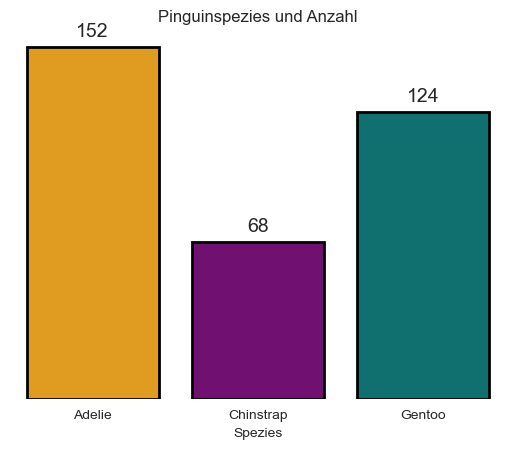
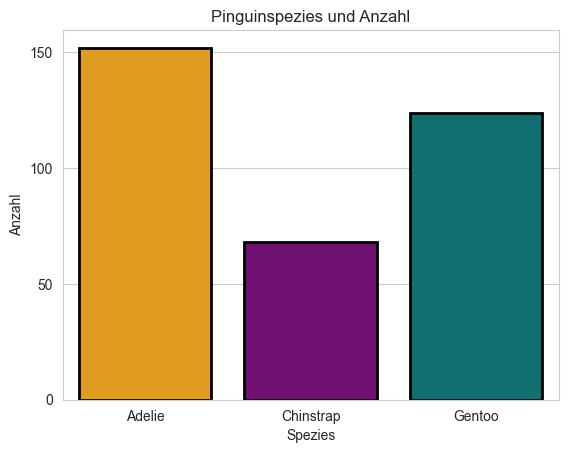

## 2. Lineplot


---

Lineplots eignen sich, um **Veränderungen über Zeit** darzustellen. Eine Linie sollte dabei eine einzige fortlaufende Zeitreihe darstellen. Wenn mehrere Zeitreihen (z.B. Veränderung über Zeit in mehreren Ländern) dargestellt werden, sollten mehrere Linien verwendet werden. 

In [ ]:
flights.head()

In [ ]:
# Einfacher Lineplot
# Frage: Was sehen wir um die Linie?
sns.lineplot(flights, x='year', y='passengers');

In [ ]:
# Warum es breiter wird:

In [ ]:
print(flights[flights.year == 1960].passengers.min())
print(flights[flights.year == 1960].passengers.max())

In [ ]:
print(flights[flights.year == 1950].passengers.min())
print(flights[flights.year == 1950].passengers.max())

In [ ]:
# Das Konfidenzintervall lässt sich über n_boot steuern
sns.lineplot(flights, x='year', y='passengers', n_boot=12);

In [ ]:
# Nur die Linie:
sns.lineplot(flights, x='year', y='passengers', errorbar=None);

In [ ]:
# Lineplot mit bearbeiteter Linie:
sns.lineplot(
    flights,
    x='year',
    y='passengers',
    lw=2,
    errorbar='sd',
    linestyle='dashdot'
);  # solid, dashed, dotted, dashdot

In [ ]:
# Gruppierter Lineplot (zu viele Linien!):
sns.lineplot(flights,
             x='year',
             y='passengers',
             hue='month');

In [ ]:
# Gruppierter Lineplot mit Style (ebenfalls unübersichtlich!):
sns.lineplot(
    flights,
    x='year',
    y='passengers',
    style='month'
);

In [ ]:
# Mit Hue und Style für zwei separate kategorische Gruppierungen verwenden
# Achtung: Keine Grafik, wie man sie produzieren sollte!
sns.lineplot(
    taxis,
    x='passengers',
    y='total',
    hue='payment',
    style='color',
    errorbar=None
);

In [ ]:
# Marker im Lineplot einsetzen:
sns.lineplot(
    flights,
    x='year',
    y='passengers',
    marker='o',
    markersize=10,
    markerfacecolor='black'
);

# o - Kreise
# s - Vierecke
# v - Dreieck
# > - Dreiecke
# + - Plus
# x - X
# diam - Diamanten

In [ ]:
# Fehlerbalken und Marker
sns.lineplot(
    flights,
    x='year',
    y='passengers',
    err_style='bars',
    marker='s',
);

# 3. Scatterplot

---

Scatterplots sind gedacht, um den **Zusammenhang zwischen zwei metrischen Variablen** darzustellen.

Zusätzliche Style-Schlüsselwörter

* `size` / `s` | `markersize` / `ms`: Markierungsgröße (Scatterplot)

In [ ]:
# Einfacher Scatterplot:
sns.scatterplot(taxis,
                x='distance',
                y='total');

## Weitere Dimensionen einbringen

In [ ]:
# Gruppierter Scatterplot
sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    hue='payment',
);

In [ ]:
sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    hue='payment',
    alpha=0.5
);

In [ ]:
# Gruppierter Scatterplot mit Style
sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    hue='payment',
    style='payment'
);

In [ ]:
# Style und Hue mit kategorischen Infos:
sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    hue='payment',
    style='color'
);

In [ ]:
# Numeric Hue:
sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    hue='tip'
);
# Quizfrage: Was macht dieser Numeric Hue hier eigentlich?
# ...

In [ ]:
# Gibt es als Tip wirklich nur diese 6 Werte? Test:
taxis.tip.unique()

In [ ]:
# So viele Werte gibt es wirklich:
len(taxis.tip.unique())

In [ ]:
# Hue-Farbe ändern
# Farbpaletten: https://seaborn.pydata.org/tutorial/color_palettes.html
sns.scatterplot(
    data=taxis,
    x='distance',
    y='total',
    hue='tip',
    palette='rocket'
);

In [ ]:
# Quizfrage: Was ist hier passiert?
# sns.scatterplot(data=taxis,
#                 x='distance',
#                 y='total',
#                 hue='tip',
#                 palette='deep');

# Auskommentiert aus Ladezeitgründen!

In [ ]:
# Notizen hier:

# Kategorische Farbpalette für sequentielle Daten
# Keine gute Idee!
# 1. Die Farbgebung der Grafik ist nicht interpretierbar
# 2. Die Legende explodiert, weil alle Einzelwerte als Kategorien verstanden werden
# 3. Die Farbpalette wiederholt sich immer wieder und ordnet damit verschiedenen Zahlenwerten dieselben Farbtöne zu!

In [ ]:
# Marker selbst kontrollieren
# Liste an Markern: https://matplotlib.org/stable/api/markers_api.html
markers = {'yellow': 's', 'green': 'X'}

sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    style='color',
    markers=markers
);

## Achsen stilisieren

In [ ]:
# Einfacher Scatterplot mit Label, Titel, Ticks...
ax = sns.scatterplot(taxis,
                     x='distance',
                     y='total')

ax.set(xlabel='distance in miles',
       title='Scatterplot total cost vs distance',
       xticks=[4, 8, 15, 20, 40, 80],
       xlim=[0, 80]);

In [ ]:
# Einfacher Scatterplot mit farbigem Gitter und farbiger Überschrift
# rc steht für runtime configuration und umfasst eine Reihe von Standard-Einstellungen
# für Plots, mit denen Matplotlib und damit auch Seaborn geladen wird.
# Durch Zugriff auf rc können diese Einstellungen geändert werden.
# Damit diese Veränderung nicht bei jedem weiteren Plot greifen, nutzen wir 'with':
with sns.axes_style(rc={'grid.color': 'red',
                        'text.color': 'green'}):
    ax = sns.scatterplot(taxis, x='distance', y='total')
    ax.set(title='Test')

## Facettierung / Plotgitter

Um mehrere Plots in einem Gitter anzuordnen kann `relplot` verwendet werden. Relplot kann Line- und Scatterplots erzeugen.

In [ ]:
# FacetGrid / auftrennen in mehrere Plots
sns.relplot(
    taxis,
    x='distance',
    y='total',
    row='color',
    col='payment'
);

## Übungsaufgabe Scatterplot

Lade den `penguins` Datensatz und erstelle den gezeigten Scatterplot.

![2_penguins_plot.png](2_penguins_scatterplot.png)
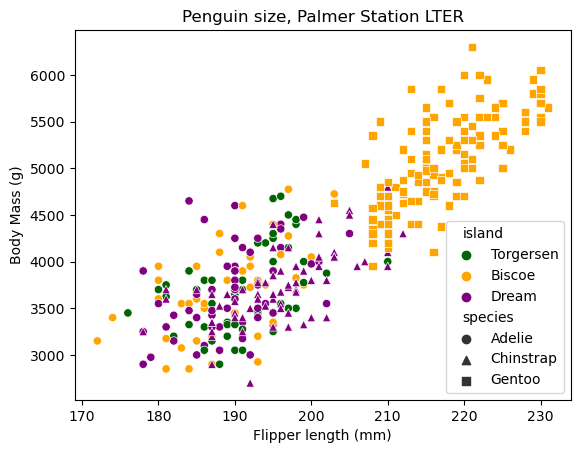